### Star Wars Survey

In this project, we will be analyzing data on the Star Wars movies.

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. 
To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which we can download from their GitHub repository.

The data has several columns, including:

- **RespondentID** - An anonymized ID for the respondent (person taking the survey)
- **Gender** - The respondent's gender
- **Age** - The respondent's age
- **Household** Income - The respondent's income
- **Education** - The respondent's education level
- **Location (Census Region)** - The respondent's location
- **Have you seen any of the 6 films in the Star Wars franchise?** - Has a Yes or No response
- **Do you consider yourself to be a fan of the Star Wars film franchise?** - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
print(pd.isnull(star_wars['RespondentID']).value_counts())
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]
star_wars.head()

False    1186
True        1
Name: RespondentID, dtype: int64


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
pd.isnull(star_wars['RespondentID']).value_counts()

False    1186
Name: RespondentID, dtype: int64

In [5]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [7]:
Bool_dict = {
    'Yes':True,
    'No':False,
    True:True,
    False:False
    }

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(Bool_dict)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(Bool_dict)

print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


In [8]:
def map_values(input_col):
    movie = input_col.value_counts().index[0]
    col_val_dict = {
        movie:True,
        np.NaN:False,
        True:True,
        False:False
    }
    input_col = input_col.map(col_val_dict)
    return input_col

In [9]:
for i in range(3,9):
    star_wars.iloc[:,i] = map_values(star_wars.iloc[:,i])
    print(star_wars.iloc[:,i].value_counts(dropna=False))

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
False    615
True     571
Name: Unnamed: 4, dtype: int64
False    636
True     550
Name: Unnamed: 5, dtype: int64
True     607
False    579
Name: Unnamed: 6, dtype: int64
True     758
False    428
Name: Unnamed: 7, dtype: int64
True     738
False    448
Name: Unnamed: 8, dtype: int64


In [10]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [11]:
change_col_dict = {}
new_col_names_3_to_8 = ['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']
count = 0
for each in star_wars.columns[3:9]:
    change_col_dict[each] = new_col_names_3_to_8[count]
    count += 1

star_wars = star_wars.rename(columns=change_col_dict)
print(star_wars.columns[3:9])

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')


In [12]:
star_wars.iloc[:,9:15] = star_wars.iloc[:,9:15].astype(float)

change_col_dict2 = {}
new_col_names_9_to_14 = ["ranking_1", "ranking_2", "ranking_3", "ranking_4","ranking_5","ranking_6"]

count = 0
for name in star_wars.columns[9:15]:
    change_col_dict2[name] = new_col_names_9_to_14[count]
    count += 1
    
star_wars = star_wars.rename(columns=change_col_dict2)
print(star_wars.columns[9:15])

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')


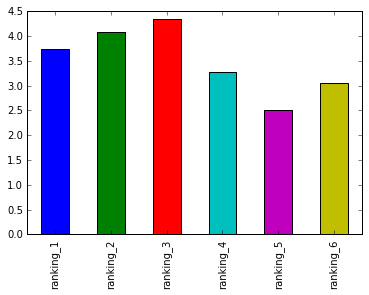

In [13]:
%matplotlib inline

star_wars.iloc[:, 9:15].mean().plot.bar()
plt.show()

### Obervation on top ranked movie of Star War franchise
- The fifth installment of the franchise (The Empire Strikes Back) got the highest ranking of all. Majority of users voted it as most favorite or likely second most favorite.

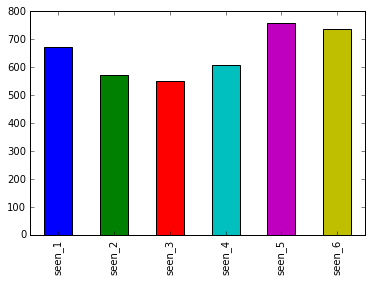

In [14]:
star_wars.iloc[:,3:9].sum().plot.bar()
plt.show()

### Observaton on movie viewership
- Top viewed movie is Movie 5 followed by 6.
- Ranting is strongly and positively correlated to viewership (stands good for most movies).
- May be the movie 5 is best of all and hence the viewership is high and the rating is good.

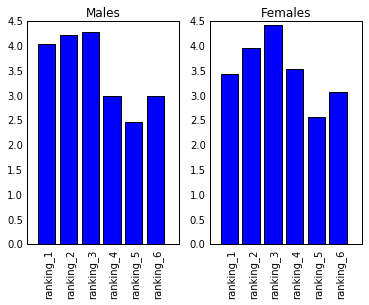

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
bar_positions = np.arange(6) + 0.5

Males = star_wars[star_wars['Gender'] == 'Male']
Females = star_wars[star_wars['Gender'] == 'Female']
ax1.bar(bar_positions, Males.iloc[:, 9:15].mean())
ax1.set_xticklabels(new_col_names_9_to_14, rotation=90)
ax1.set_title('Males')
ax1.set_xticks(range(1,7))
ax1.tick_params(bottom='off', top='off', left='off', right='off')
ax2.bar(bar_positions, Females.iloc[:, 9:15].mean())
ax2.set_xticklabels(new_col_names_9_to_14, rotation=90)
ax2.set_title('Females')
ax2.set_xticks(range(1,7))
ax2.tick_params(bottom='off', top='off', left='off', right='off')

### Observation on Movie rating grouped by Gender
- Unanimously Movie 5 followed by movie 6 are given top ratings by both genders.
- Other movie ratings also more or less same

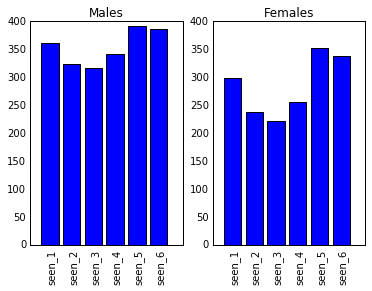

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
bar_positions = np.arange(6) + 0.5

Males = star_wars[star_wars['Gender'] == 'Male']
Females = star_wars[star_wars['Gender'] == 'Female']
ax1.bar(bar_positions, Males.iloc[:, 3:9].sum())
ax1.set_xticklabels(new_col_names_3_to_8, rotation=90)
ax1.set_title('Males')
ax1.set_xticks(range(1,7))
ax1.tick_params(bottom='off', top='off', left='off', right='off')
ax2.bar(bar_positions, Females.iloc[:, 3:9].sum())
ax2.set_xticklabels(new_col_names_3_to_8, rotation=90)
ax2.set_title('Females')
ax2.set_xticks(range(1,7))
ax2.tick_params(bottom='off', top='off', left='off', right='off')

### Observation on Movie viewership grouped by Gender
- In the given sample data, the Male viewership is larger compared to female.
- This trend is same across different movies.